# Income Qualification
### Machine Learning Final Project\

#### Goal
Identify the level of income qualification needed for the families in Latin America.

#### Problem Statement
Many social programs have a hard time ensuring that the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of the population. This segment of the population can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their homes to
classify them and predict their level of need.

While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.

The Inter-American Development Bank (IDB)believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.

The data dictionary can be found here: https://lms.simplilearn.com/user/project/download-attachment?file=1561982588_incomequalificationprojectdescription.pdf

In [191]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # For plotting graphs   
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [224]:
df = pd.read_csv('train.csv')
df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.00,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.00,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.00,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.00,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.50,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.25,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.33,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.78,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.33,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.78,1.0,121.0,1369,4


### Identify the output variable.

The *output variable,* aka the *target variable,* is column *Target.* It ranges from 1-4. Based on the below boxplot, it appears that, inferring from rent payment, that 1 appears to be the lowest income level while 4 would be the highest. 

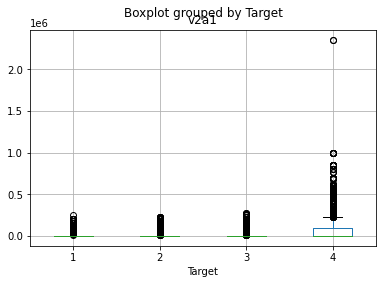

In [171]:
# Monthly rent payment and income level

boxplot = df.boxplot(column=['v2a1'], by='Target')

### Understand the type of data.

In [193]:
pd.set_option('display.max_info_rows', 1500)
pd.set_option('display.max_columns', 2500)
pd.set_option('display.width', 10000)
pd.set_option('display.precision', 2)

In [81]:
# Check for nulls

has_nulls = df.isnull().sum()
has_nulls[has_nulls > 0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

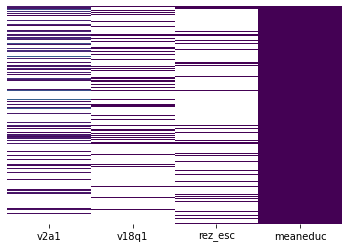

In [82]:
# heatmap of missing data

sns.heatmap(df.loc[:, ['v2a1', 'v18q1', 'rez_esc', 'meaneduc']],yticklabels=False,cbar=False,cmap='viridis');

1. v2a1 is the monthly rent payment. To verify if this correlates with homeownership or other characteristic.
1. v18q1 is the number of tablets owned by the household. As there is already data on whether each individual has one, to investigate whether in the non-missing data, v18q and v18q1 correspond.
1. rez_esc is the years behind in school. To investigate whether this correlates with age or employment status.
1. meanedu is the average years of education for household adults. As there are only 5 missing values (the other are over 40%), it is reasonable to simply replace with the median value.
1. SQBmeaned is merely the square of meanedu, and so needs no separate analysis.

##### v2a1 (monthly rent paid) is null when: 
1. The home is owned and fully paid (most common case). This may mean 0 is appropriate.
1. Their housing is "precarious" (potentially homeless). This may mean 0 is appropriate.
1. Their housing assigned or borrowed. This may mean 0 is appropriate.

###### Therefore, null v2a1 values will be replaced with 0.

In [44]:
# does a null v2a1 correlate with other characteristics?

temp = df[df['v2a1'].isna()]
# temp = df[pd.is_numeric_dtype(df['dependency'])]
#temp = temp[(pd.to_numeric(df['dependency'], errors='coerce')>0) ]
temp.groupby(['tipovivi1', 'tipovivi2','tipovivi3', 'tipovivi4', 'tipovivi5']).count()

Id  v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  r4h1  r4h2  r4h3  r4m1  r4m2  r4m3  r4t1  r4t2  r4t3  tamhog  tamviv  escolari  rez_esc  hhsize  paredblolad  paredzocalo  paredpreb  pareddes  paredmad  paredzinc  paredfibras  paredother  pisomoscer  pisocemento  pisoother  pisonatur  pisonotiene  pisomadera  techozinc  techoentrepiso  techocane  techootro  cielorazo  abastaguadentro  abastaguafuera  abastaguano  public  planpri  noelec  coopele  sanitario1  sanitario2  sanitario3  sanitario5  sanitario6  energcocinar1  energcocinar2  energcocinar3  energcocinar4  elimbasu1  elimbasu2  elimbasu3  elimbasu4  elimbasu5  elimbasu6  epared1  epared2  epared3  etecho1  etecho2  etecho3  eviv1  eviv2  eviv3   dis  male  female  estadocivil1  estadocivil2  estadocivil3  estadocivil4  estadocivil5  estadocivil6  estadocivil7  parentesco1  parentesco2  parentesco3  parentesco4  parentesco5  parentesco6  parentesco7  parentesco8  parentesco9  parentesco10  parentesco11  parentesco12  idhogar  hogar_nin  hogar_adul  hogar_mayor  hogar_total  dependency  edjefe  edjefa  meaneduc  instlevel1  instlevel2  instlevel3  instlevel4  instlevel5  instlevel6  instlevel7  instlevel8  instlevel9  bedrooms  overcrowding  computer  television  mobilephone  qmobilephone  lugar1  lugar2  lugar3  lugar4  lugar5  lugar6  area1  area2   age  SQBescolari  SQBage  SQBhogar_total  SQBedjefe  SQBhogar_nin  SQBovercrowding  SQBdependency  SQBmeaned  agesq  Target
tipovivi1 tipovivi2 tipovivi3 tipovivi4 tipovivi5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
0         0         0         0         1           786     0     786    786     786   786     786   786     96   786   786   786   786   786   786   786   786   786     786     786       786      153     786          786          786        786       786       786        786          786         786         786          786        786        786          786         786        786             786        786        786        786              786             786          786     786      786     786      786         786         786         786         786         786            786            786            786            786        786        786        786        786        786        786      786      786      786      786      786      786    786    786    786   786   786     786           786           786           786           786           786           786           786          786          786          786          786          786          786          786          786          786          

##### v18q1 is only null when a person does not own a tablet
v18q1 is the number of tablets owned by the household. As there is already data on whether each individual has one, to investigate whether in the non-missing data, v18q and v18q1 correspond.

1. If v18q1 is null (total household tablets), all individuals are also indicated as not having a tablet.
1. If a person is indicated to not have a tablet, their household, their household count is null
1. If a person is indicated to have a tablet, their household count is positive

###### Therefore, null v18q1 values will be replaced with 0.

In [50]:
# does a null v18q1 correlate with other characteristics?

temp = df[df['v18q1'].isna()]
temp.groupby(['v18q']).sum()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
v18q,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.67e+08,345,34878,215,7293,6961,0.0,2900,11508,14408,2824,12151,14975,5724,23659,29383,29340,30098,48875,677.0,29340,3972,659,1524,79,975,108,11,14,4724,1919,5,10,150,534,7104,135,21,19,4515,7046,266,30,6399,3,21,904,37,1369,5780,135,21,18,3343,3527,454,6302,274,743,11,0,12,915,2684,3743,1091,2367,3884,910,2107,4325,474,3592,3750,989,980,1839,226,500,265,2543,2318,1327,2768,99,66,392,78,17,102,25,92,58,10443,18897,2237,29340,62099.97,1039,1363,1705,1411,778,144,116,722,61,19497,12208.13,4589,613,1310,140,690,378,1857,7107,19738,3956,747,471,702,772,694,4940,2402,255441,467395,12452445,141716,303398,29645,25954.85,32244.43,638560.14,12452445,23273


In [53]:
# temp = df[df['v18q']==0]
df.groupby(['v18q1', 'v18q']).count()

,,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
v18q1,v18q,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,1,1586,547,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,275,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586
2.0,1,444,131,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,78,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444
3.0,1,129,76,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,31,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129
4.0,1,37,20,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,10,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
5.0,1,13,0,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,3,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13

rez_esc is the years behind in school. To investigate whether this correlates with age or employment status.

1. rez_esc is null for those too young (<7 y.o.) or too old (>17 y.o.) to be in primary or secondary education.
1. It is null for those with more than 11 years of education, presumably those with tertiary or post-graduate education. 

###### Therefore, null rez_esc values will be replaced with 0.


In [60]:
df.rez_esc.unique()

array([nan,  1.,  0.,  3.,  2.,  4.,  5.])

In [73]:
temp = df
temp.fillna(-1, inplace=True)
pd.crosstab(temp.escolari, temp.rez_esc, rownames=['Years of Schooling'], colnames=['Years behind in school'])

Years behind in school,-1.0,0.0,1.0,2.0,3.0,4.0,5.0
Years of Schooling,,,,,,,
0,1203,96,5,0,1,0,2
1,103,132,10,0,1,0,1
2,151,140,20,2,3,1,1
3,269,102,19,7,3,0,1
4,162,116,19,5,3,1,0
5,200,118,18,3,3,0,4
6,1752,127,26,25,28,27,0
7,290,119,37,29,13,0,0
8,347,85,39,27,0,0,0


In [75]:
temp = df[((df.age<25))]
pd.crosstab(temp.age, temp.rez_esc, rownames=['Age'], colnames=['Years behind in school'])

Years behind in school,-1.0,0.0,1.0,2.0,3.0,4.0,5.0
Age,,,,,,,
0,99,0,0,0,0,0,0
1,120,0,0,0,0,0,0
2,116,0,0,0,0,0,0
3,143,0,0,0,0,0,0
4,139,0,0,0,0,0,0
5,134,0,0,0,0,0,0
6,150,0,0,0,0,0,0
7,0,140,0,0,0,0,0
8,0,131,5,0,0,0,0


In [212]:
df.info(show_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 145 columns):
 #    Column           Non-Null Count  Dtype  
---   ------           --------------  -----  
 0    Id               9557 non-null   object 
 1    v2a1             9557 non-null   float64
 2    hacdor           9557 non-null   int64  
 3    rooms            9557 non-null   int64  
 4    hacapo           9557 non-null   int64  
 5    v14a             9557 non-null   int64  
 6    refrig           9557 non-null   int64  
 7    v18q             9557 non-null   int64  
 8    v18q1            9557 non-null   float64
 9    r4h1             9557 non-null   int64  
 10   r4h2             9557 non-null   int64  
 11   r4h3             9557 non-null   int64  
 12   r4m1             9557 non-null   int64  
 13   r4m2             9557 non-null   int64  
 14   r4m3             9557 non-null   int64  
 15   r4t1             9557 non-null   int64  
 16   r4t2             9557 non-null   int64  

In [194]:
int_cols = df.select_dtypes(np.int64).columns
print('Integer:\t', int_cols)

flt_cols = df.select_dtypes(np.float64).columns
print('Floats:\t', flt_cols)

obj_cols = df.select_dtypes(np.object_).columns
print('Object:\t', obj_cols)

Integer:	 Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2', 'r4h3', 'r4m1',
       ...
       'area1', 'area2', 'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'agesq', 'Target'], dtype='object', length=130)
Floats:	 Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned'], dtype='object')
Object:	 Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')


In [99]:
# float data

df[flt_cols].head()

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,190000.0,NaN,NaN,10.0,1.00,1.00,0.0,100.0
1,135000.0,1.0,NaN,12.0,1.00,1.00,64.0,144.0
2,NaN,NaN,NaN,11.0,0.50,0.25,64.0,121.0
3,180000.0,1.0,1.0,11.0,1.33,1.78,1.0,121.0
4,180000.0,1.0,NaN,11.0,1.33,1.78,1.0,121.0


#### Replace nulls with appropriate values
'v2a1', 'v18q1', and 'rez_esc' nulls to be replaced with 0
'meaneduc' to be replaced with median

In [195]:
df.v2a1.fillna(0, inplace=True)
df.v18q1.fillna(0, inplace=True)
df.rez_esc.fillna(0, inplace=True)
df.meaneduc.fillna(df.meaneduc.median, inplace=True)
df.SQBmeaned.fillna(df.SQBmeaned.median, inplace=True)

In [196]:
# Check for nulls

has_nulls = df.isnull().sum()
has_nulls[has_nulls > 0]

Series([], dtype: int64)

##### Review non-numeric data columns
The non-numeric columns are: Id, idhogar (household ID), dependency, edjefe (education year of a male head of household), and edjefa (education year of a female head of household).

The two IDs will not be investigated, as they are hex-base unique or semi-unique identifiers, of individuals and households, respectively. 

The last three non-numeric columns have mostly numeric values, except for some 'yes' and 'no' entries. Let's dig in further.

1. 'dependency' is supposed to be a rate of the number of (minors + seniors)/(working-age adults). 41% of these values are yes or no. Are these values only recorded for Head of Household (HoH)?

1. 'edjefe' is supposed to be years of education of a male head of household. 41% of these values are yes or no. Are these values only recorded for Head of Household (HoH)?

1. 'edjefa' is supposed to be years of education of a female head of household. 66% of these values are yes or no. Are these values only recorded for Head of Household (HoH)?

In [197]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


For dependency, the data dictionary says that yes = 1, and no = 0, but the data does not support substituting those values. There is minimal difference in the yes/no distribution between people who are listed as HoH, and the range goes from ~0.2 to 8. It may be better to derive this number separately. 

In [43]:
temp = df[df['dependency'].isin(['yes','no'])]
# temp = df[pd.is_numeric_dtype(df['dependency'])]
#temp = temp[(pd.to_numeric(df['dependency'], errors='coerce')>0) ]
temp.groupby(['parentesco1', 'dependency']).count()


Id  v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  r4h1  r4h2  r4h3  r4m1  r4m2  r4m3  r4t1  r4t2  r4t3  tamhog  tamviv  escolari  rez_esc  hhsize  paredblolad  paredzocalo  paredpreb  pareddes  paredmad  paredzinc  paredfibras  paredother  pisomoscer  pisocemento  pisoother  pisonatur  pisonotiene  pisomadera  techozinc  techoentrepiso  techocane  techootro  cielorazo  abastaguadentro  abastaguafuera  abastaguano  public  planpri  noelec  coopele  sanitario1  sanitario2  sanitario3  sanitario5  sanitario6  energcocinar1  energcocinar2  energcocinar3  energcocinar4  elimbasu1  elimbasu2  elimbasu3  elimbasu4  elimbasu5  elimbasu6  epared1  epared2  epared3  etecho1  etecho2  etecho3  eviv1  eviv2  eviv3   dis  male  female  estadocivil1  estadocivil2  estadocivil3  estadocivil4  estadocivil5  estadocivil6  estadocivil7  parentesco2  parentesco3  parentesco4  parentesco5  parentesco6  parentesco7  parentesco8  parentesco9  parentesco10  parentesco11  parentesco12  idhogar  hogar_nin  hogar_adul  hogar_mayor  hogar_total  edjefe  edjefa  meaneduc  instlevel1  instlevel2  instlevel3  instlevel4  instlevel5  instlevel6  instlevel7  instlevel8  instlevel9  bedrooms  overcrowding  tipovivi1  tipovivi2  tipovivi3  tipovivi4  tipovivi5  computer  television  mobilephone  qmobilephone  lugar1  lugar2  lugar3  lugar4  lugar5  lugar6  area1  area2   age  SQBescolari  SQBage  SQBhogar_total  SQBedjefe  SQBhogar_nin  SQBovercrowding  SQBdependency  SQBmeaned  agesq  Target
parentesco1 dependency                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
0           no           932   246     932    932     932   932     932   932    249   932   932   932   932   932   932   932   932   932     932     932       932        0     932          932          932        932       932       932        932          932         932         932          932        932        932          932         932        932             932        932        932        932              932             932          932     932      932     932      932         932         932         932         932         932            932            932            932            932        932        932        932        932        932        932      932      932      932      932      932      932    932    932    932   932   932     932           932           932           932           932           932           932           932          932          932          932          932          932          932          932          932           932   

In [11]:
# the 'yes'  and 'no' responses do no depend on whether the individual is HoH

pd.crosstab(df.parentesco1, df.dependency, rownames=['Head of Household'], colnames=['Dependency'])

Dependency,.16666667,.2,.22222222,.25,.2857143,.33333334,.40000001,.5,.60000002,.66666669,.71428573,.75,.80000001,.83333331,1.2,1.25,1.3333334,1.5,1.6666666,1.75,2,2.25,2.5,3,3.5,4,5,6,8,no,yes
Head of Household,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6,75,10,209,8,452,72,1035,7,391,11,84,16,10,10,16,72,573,7,10,529,12,66,180,16,81,20,6,129,932,1539
1,1,15,1,51,1,146,12,462,1,96,1,14,2,1,1,2,12,140,1,1,201,1,11,56,2,19,4,1,249,815,653


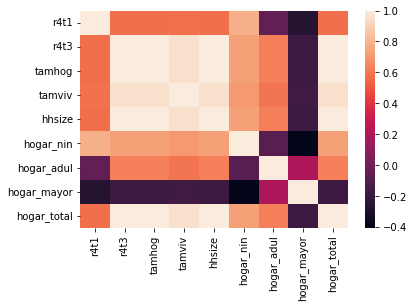

In [94]:
temp = df[(pd.to_numeric(df['dependency'], errors='coerce')>0)]
temp = temp[['r4t1', 'r4t3', 'tamhog', 'tamviv', 'hhsize', 'hogar_nin', 'hogar_adul'
            ,'hogar_mayor', 'hogar_total']]

sns.heatmap(temp.corr());

##### Edjefe / edjefa : years of education of head of household?

1. Based on the calculation, the 'yes' and 'no' values in edjefe and edjefa correspond with 1 and 0 years of education for the respective head of household.
1. If the head of household is female, their edjefe column is 'no', and vice versa

###### Therefore: replace 'yes' and 'no' in the edjefe/a columns with 1 and 0

In [151]:
# looking for household group
# 1 member is parentesco == 1
# edjefe & edjefa == 0
#temp = df[df['dependency'].isin(['yes','no'])]

hoh_count = df.groupby(['idhogar'])['parentesco1'].sum()
hoh_count[hoh_count != 1]

hoh_no_ed = df[(df['edjefe'] == 'no') & (df['edjefa'] == 'no') & (df['idhogar'].isin(hoh_count[hoh_count == 1]))]
hoh_no_ed.groupby(['idhogar', 'parentesco1'])['male'].sum()

Series([], Name: male, dtype: int64)

##### Due to multicollinearity, can drop:
1. r4t3, tamhog, and hhsize since they all have an R2 of 1 with hogar_total

##### The column 'dependency' has minimal (0.38) correlation with its purported value (ratio dependents: adults), and has >40 % problematic (string) values, so it will be dropped. The calculated value will be used instead.

In [112]:
temp = temp[['r4t1', 'tamviv', 'hogar_nin', 'hogar_adul'
            ,'hogar_mayor', 'hogar_total']]
temp['num_depend'] = temp['hogar_nin'] + temp['hogar_mayor']
temp['dependency'] = df['dependency']
temp['depend_calc'] = temp.num_depend / temp.hogar_adul
pd.crosstab(temp.depend_calc, temp.dependency, rownames=['Calculated Dependency'], colnames=['Provided Dependency'])

Provided Dependency,.16666667,.2,.25,.2857143,.33333334,.40000001,.5,.60000002,.66666669,.75,.80000001,.83333331,1.2,1.25,1.3333334,1.5,2,2.5,3,3.5,4,5,8,no,yes
Calculated Dependency,,,,,,,,,,,,,,,,,,,,,,,,,
0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,513,0
0.17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.20,0,11,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.25,0,0,34,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.29,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.33,0,0,0,0,86,0,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.40,0,0,0,0,0,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.50,0,0,0,0,0,0,276,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88
0.60,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,3


In [113]:
temp = temp[['r4t1', 'tamviv', 'hogar_nin', 'hogar_adul'
            ,'hogar_mayor', 'hogar_total']]
temp['num_depend'] = temp['hogar_nin'] + temp['hogar_mayor']
temp['dependency'] = df['dependency']
temp['depend_calc'] = temp.num_depend / temp.hogar_adul
temp = temp[pd.to_numeric(temp['dependency'], errors='coerce').notnull()]
temp.dependency = temp.dependency.astype('float64')
temp.corr()

,r4t1,tamviv,hogar_nin,hogar_adul,hogar_mayor,hogar_total,num_depend,dependency,depend_calc
r4t1,1.00e+00,0.54,0.74,-2.24e-03,-0.37,0.55,0.57,-0.22,0.48
tamviv,5.45e-01,1.00,0.72,6.13e-01,-0.33,0.94,0.58,-0.48,0.19
hogar_nin,7.39e-01,0.72,1.00,1.49e-02,-0.53,0.76,0.75,-0.31,0.63
hogar_adul,-2.24e-03,0.61,0.01,1.00e+00,0.07,0.66,0.07,-0.43,-0.44
hogar_mayor,-3.70e-01,-0.33,-0.53,6.63e-02,1.00,-0.35,0.17,0.67,0.06
hogar_total,5.52e-01,0.94,0.76,6.63e-01,-0.35,1.00,0.60,-0.52,0.19
num_depend,5.68e-01,0.58,0.75,6.93e-02,0.17,0.60,1.00,0.16,0.78
dependency,-2.25e-01,-0.48,-0.31,-4.33e-01,0.67,-0.52,0.16,1.00,0.38
depend_calc,4.80e-01,0.19,0.63,-4.40e-01,0.06,0.19,0.78,0.38,1.00


In [108]:
temp.shape

(5618, 9)

### Replace dirty data
drop: dependency, r4t3, tamhog, hhsize, 
add: depend calc
'v2a1', 'v18q1',  'rez_esc': nulls to be replaced with 0 
'meaneduc', SQBmeaned: to be replaced with median
edjefe, edjefa: replace yes/no with 1/0, convert to int
replace True/False in hoh_mujer with 1/0

##### Review numeric data for outliers & missing data



In [233]:
#df.drop(['dependency', 'r4t3', 'tamhog', 'hhsize'], axis=1, inplace=True)
df.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,tamviv,escolari,rez_esc,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,num_depend,depend_ratio
count,9.56e+03,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9.56e+03,9557.00,9557.00,9.56e+03,9.56e+03,9557.00,9557.00,9.56e+03,9.56e+03,9557.00,9557.00,9557.00,9557.00,9.56e+03,9.56e+03,9557.00,9557.00,9557.00,9.56e+03,9557.00,9.56e+03,9.56e+03,9557.00,9.56e+03,9557.00,9557.00,9557.00,9.56e+03,9.56e+03,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9.56e+03,9557.0,9.56e+03,9557.0,9557.00,9557.00,9557.00,9557.00,9557.00,9557.0,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9.56e+03,9557.00,9557.00,9.56e+03,9557.00,9.56e+03,9557.00,9.56e+03,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.0,9557.00,9557.00,9557.00,9557.0,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00
mean,4.66e+04,0.04,4.96,0.02,0.99,0.96,0.23,0.33,0.39,1.56,1.95,0.40,1.66,2.06,0.79,3.22,4.09,7.20,0.08,0.59,0.08,0.19,8.58e-03,0.12,0.01,1.46e-03,1.46e-03,0.69,0.22,9.42e-04,1.05e-03,0.02,0.07,0.97,0.02,3.14e-03,2.20e-03,0.68,0.96,0.03,3.56e-03,0.89,3.14e-04,2.20e-03,0.11,3.87e-03,0.21,0.76,0.02,2.51e-03,1.88e-03,0.49,0.46,0.05,0.88,0.03,0.08,1.46e-03,0.0,1.26e-03,0.1,0.33,0.57,0.13,0.29,0.58,0.1,0.25,0.65,0.06,0.48,0.52,0.14,0.12,0.27,0.03,0.06,0.03,0.34,0.31,0.18,0.38,0.01,9.52e-03,0.05,0.01,2.41e-03,0.01,3.14e-03,0.01,8.68e-03,1.41,2.59,0.28,4.00,5.10,2.90,9.23,0.13,0.17,0.21,0.19,0.11,0.02,0.02,0.14,0.02,2.74,1.61,0.62,0.1,0.18,0.02,0.08,0.1,0.28,0.98,2.82,0.59,0.09,0.06,0.08,0.09,0.08,0.71,0.29,34.30,74.22,1643.77,19.13,53.50,3.84,3.25,3.90,102.58,1643.77,3.30,1.69,0.87
std,1.09e+05,0.19,1.47,0.15,0.07,0.20,0.42,0.70,0.68,1.04,1.19,0.69,0.93,1.21,1.05,1.44,1.88,4.73,0.43,0.49,0.27,0.39,9.22e-02,0.32,0.11,3.82e-02,3.82e-02,0.46,0.42,3.07e-02,3.23e-02,0.13,0.25,0.17,0.13,5.59e-02,4.68e-02,0.47,0.18,0.18,5.95e-02,0.32,1.77e-02,4.68e-02,0.31,6.21e-02,0.41,0.42,0.12,5.01e-02,4.34e-02,0.50,0.50,0.22,0.32,0.17,0.28,3.82e-02,0.0,3.54e-02,0.3,0.47,0.50,0.33,0.45,0.49,0.3,0.43,0.48,0.23,0.50,0.50,0.34,0.33,0.44,0.18,0.24,0.18,0.47,0.46,0.39,0.49,0.11,9.71e-02,0.22,0.10,4.90e-02,0.11,5.59e-02,0.11,9.28e-02,1.37,1.17,0.60,1.77,5.25,4.61,4.17,0.34,0.38,0.41,0.39,0.32,0.13,0.12,0.35,0.12,0.94,0.82,0.49,0.3,0.39,0.13,0.27,0.3,0.45,0.16,1.48,0.49,0.29,0.24,0.28,0.29,0.27,0.45,0.45,21.61,76.78,

In [226]:
df['num_depend'] = df['hogar_nin'] + df['hogar_mayor']
df['depend_ratio'] = df.num_depend / (df.hogar_adul + .01) # added to avoid divide by zero

In [230]:
df.SQBmeaned.unique()

array([1.0000000e+02, 1.4400000e+02, 1.2100000e+02, 5.2900000e+02,
       9.0250000e+01, 2.8900000e+02, 1.8225000e+02, 1.0677777e+02,
       2.2500000e+02, 4.4444443e+01, 2.7562500e+01, 4.9000000e+01,
       2.4025000e+02, 8.1000000e+01, 1.6900000e+02, 1.9600000e+02,
       2.7225000e+02, 2.0544444e+02, 8.7111107e+01, 4.2250000e+01,
       3.6000000e+01, 6.4000000e+01, 1.6000000e+01, 1.3225000e+02,
       1.6256250e+02, 1.5625000e+02, 3.0250000e+01, 6.0493824e+01,
       5.6250000e+01, 2.0250000e+01, 1.2844444e+02, 3.9062500e+01,
       2.5600000e+02, 3.6100000e+02, 2.5000000e+01, 1.5006250e+02,
       3.2111111e+01, 9.3444450e+01, 4.0000000e+00, 1.1025000e+02,
       1.2995999e+02, 1.3806250e+02, 1.8677779e+02, 6.2500000e+00,
       7.5111115e+01, 6.0062500e+01, 3.2400000e+02, 2.1025000e+02,
       7.2250000e+01, 1.0000000e+00, 3.9510201e+01, 1.0506250e+02,
       1.2250000e+01, 1.8777779e+01, 6.9444443e+01, 2.0164000e+02,
       3.4225000e+02, 4.4100000e+02, 2.1777777e+01, 3.0625000e

In [228]:
df.v2a1.fillna(0, inplace=True)
df.v18q1.fillna(0, inplace=True)
df.rez_esc.fillna(0, inplace=True)
df.meaneduc.fillna(df.meaneduc.median(axis=0, skipna=True), inplace=True)
df.meaneduc = pd.to_numeric(df.meaneduc)
df.SQBmeaned.fillna(df.SQBmeaned.median(), inplace=True)
df.SQBmeaned = pd.to_numeric(df.SQBmeaned)

In [231]:
df.edjefe.replace({'yes': 1, 'no':0}, inplace=True)
df.edjefa.replace({'yes': 1, 'no':0}, inplace=True)

df.edjefe = pd.to_numeric(df.edjefe)
df.edjefa = pd.to_numeric(df.edjefa)

In [232]:
#df.hoh_mujer.replace({True:1, False:0}, inplace=True)
df.depend_ratio.fillna(df.depend_ratio.max) # to replace the infinite value

0       0.00
1       0.99
2       0.99
3       1.00
4       1.00
        ... 
9552    0.25
9553    0.25
9554    0.25
9555    0.25
9556    0.25
Name: depend_ratio, Length: 9557, dtype: float64

### Check if there are any biases in your dataset.

The data is biased towards the non-vulnerable population, Target category 4, which comprises almost 2/3 of the data points. The most vulnerable group, category 1, is represented by less than 10% of the data. 

In [235]:
df.groupby(['Target']).count()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,tamviv,escolari,rez_esc,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,num_depend,depend_ratio
Target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755
2,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597
3,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209
4,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,59

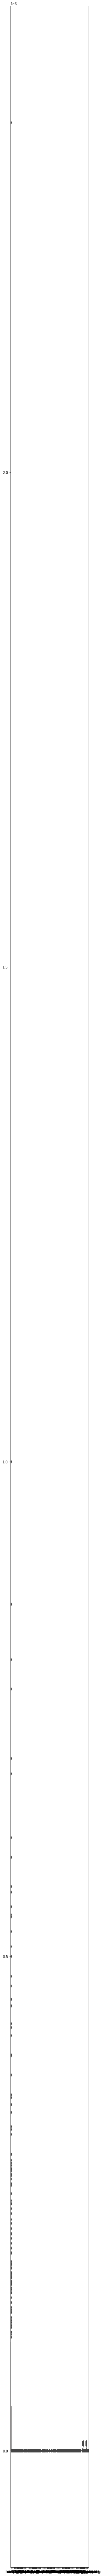

KeyboardInterrupt: 

In [168]:
# Check for OUTLIERS

fig = plt.figure(figsize = (4,135))
sns.boxplot(data = df)
plt.show()

fig, axes = plt.subplots(35, 4)

i = 0

# rows
for j in range(35):
    # columns
    for k in range(4):
        # in range
        if j+k < 139:
            sns.boxplot(data=df, x='Target', y=df.columns[j+k], ax=axes[j,k])
            
plt.tight_layout()
plt.show();

In [210]:
binary_arr = [0,1]
print(df.hoh_mujer.unique() == binary_arr)

AttributeError: 'DataFrame' object has no attribute 'hoh_mujer'

In [ ]:
binary_cols = []

for col in data.columns:
    

v2a1


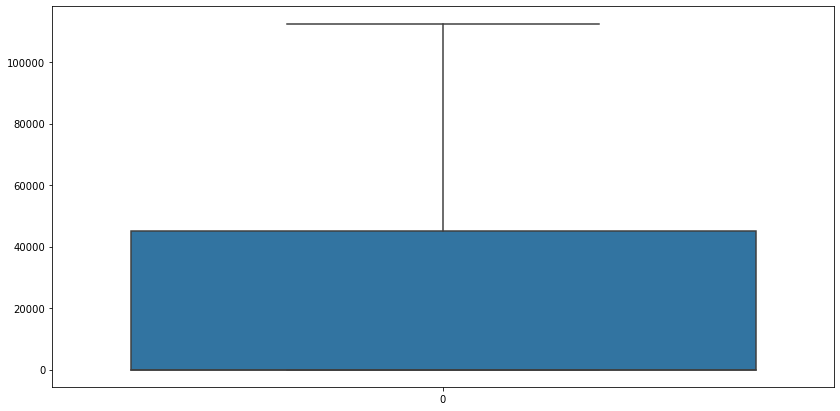

hacdor Binary column
rooms


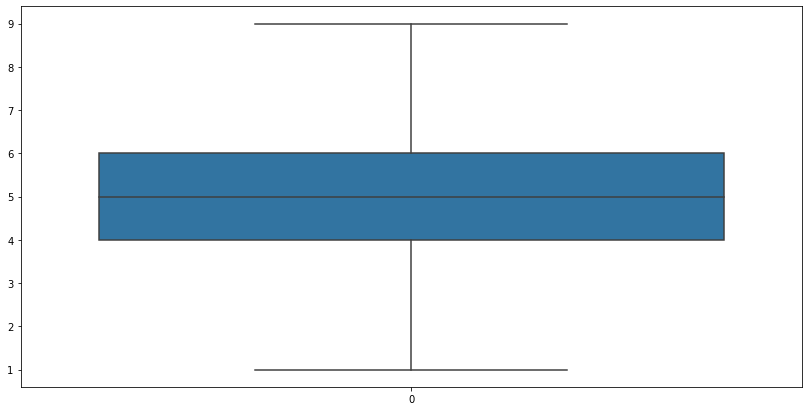

hacapo Binary column
v14a Binary column
refrig Binary column
v18q Binary column
v18q1


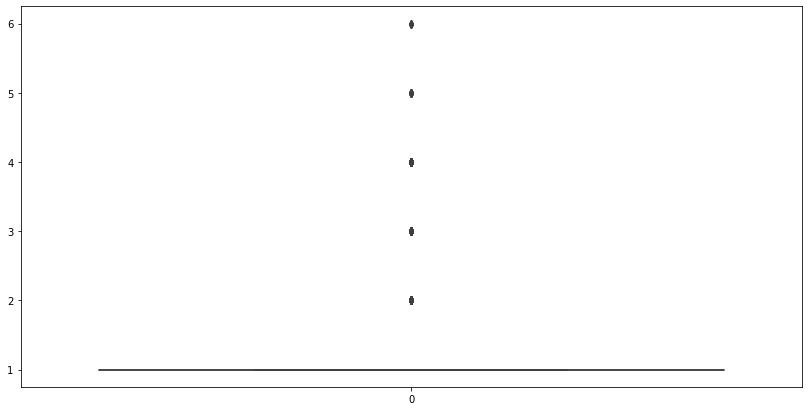

r4h1


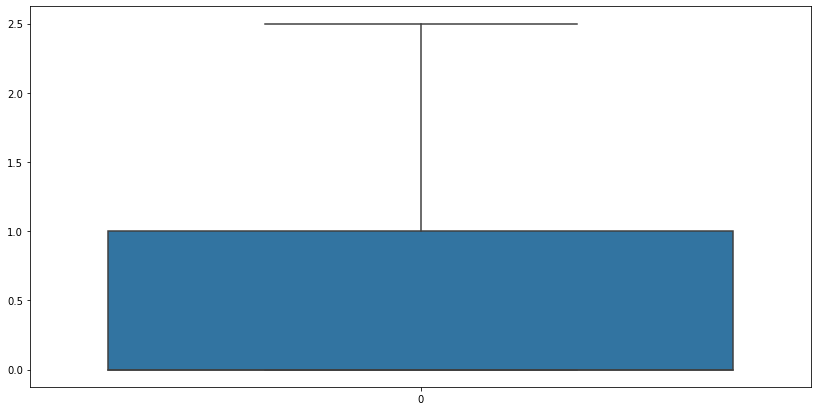

r4h2


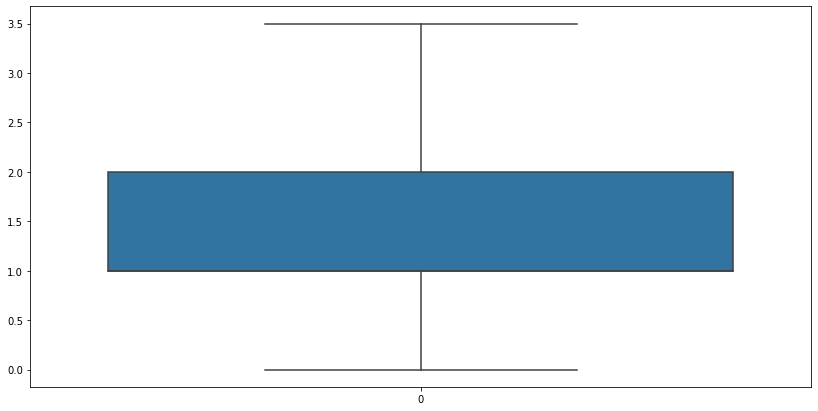

r4h3


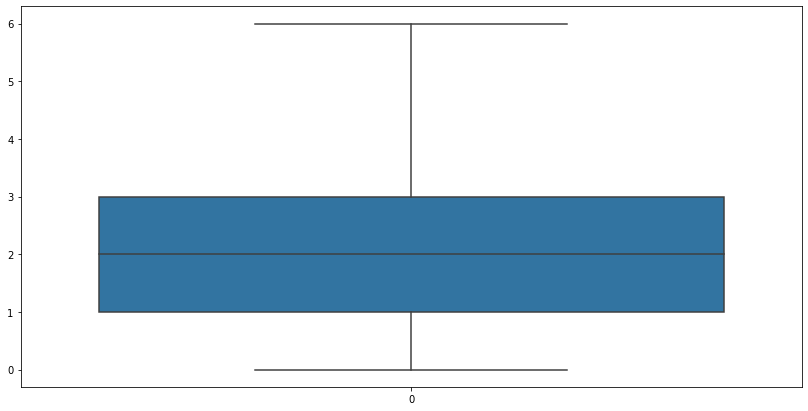

r4m1


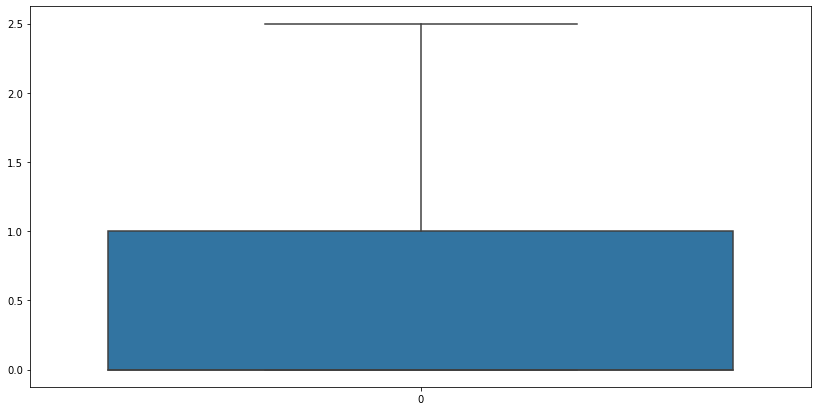

r4m2


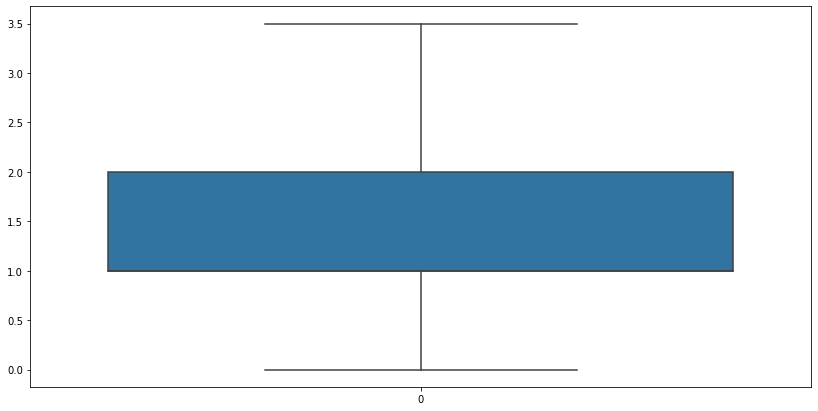

r4m3


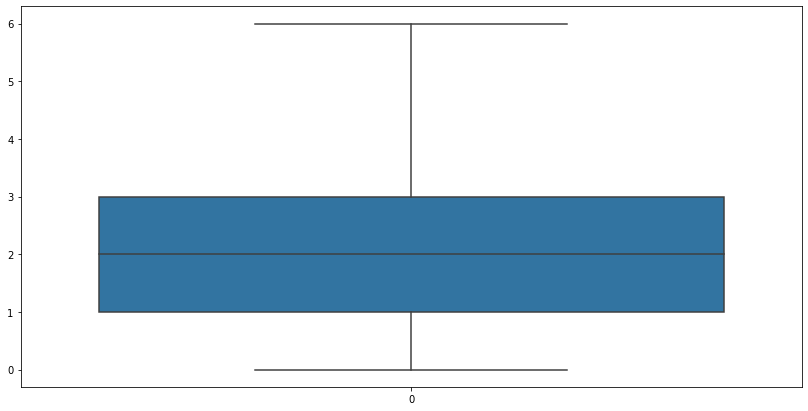

r4t1


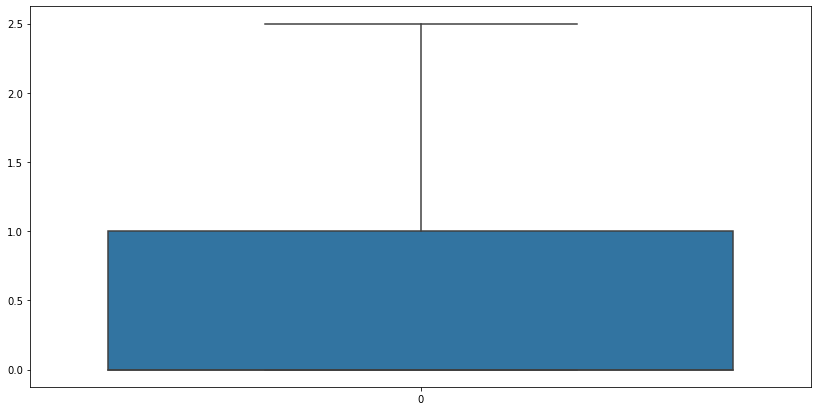

r4t2


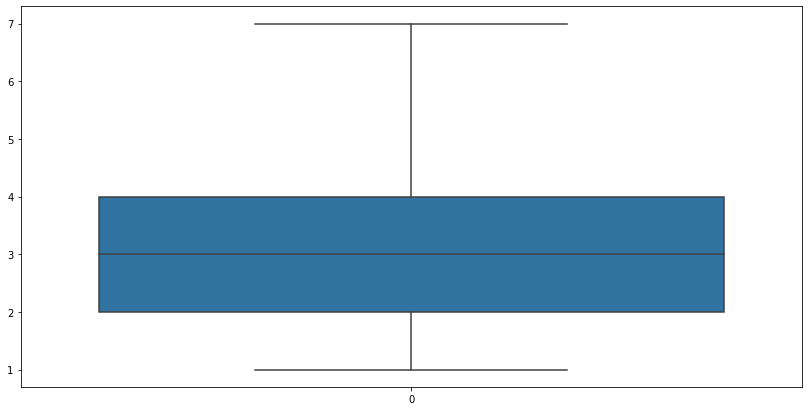

tamviv


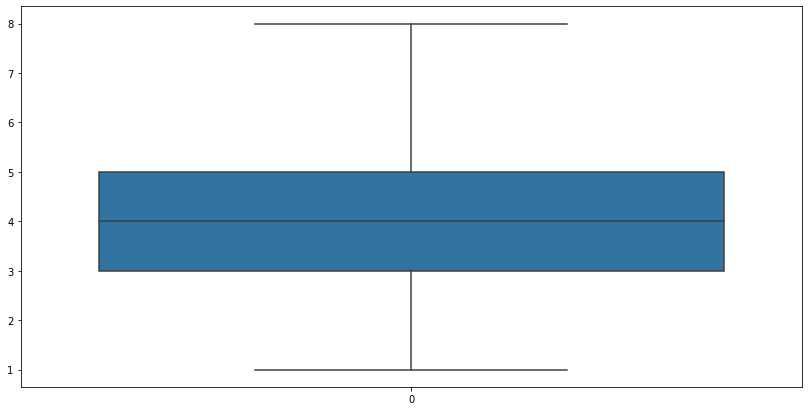

escolari


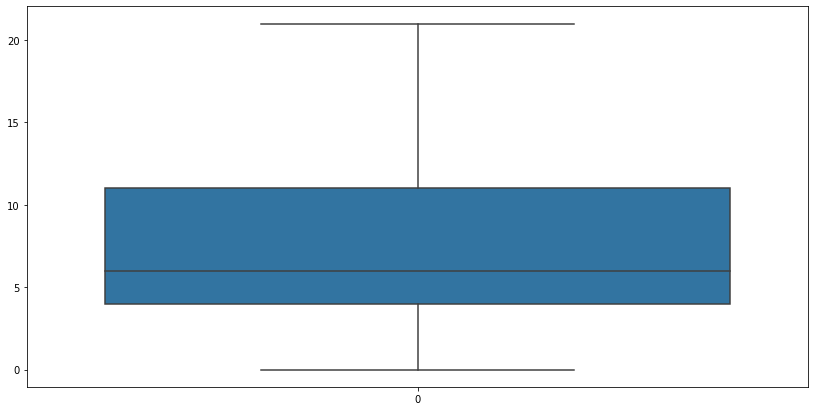

rez_esc


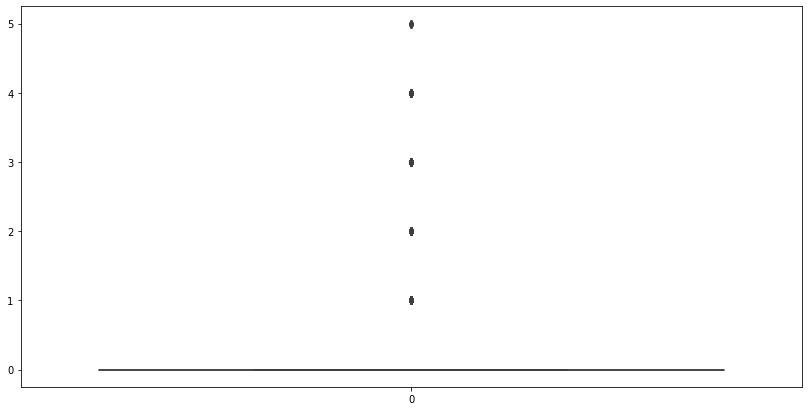

paredblolad Binary column
paredzocalo Binary column
paredpreb Binary column
pareddes Binary column
paredmad Binary column
paredzinc Binary column
paredfibras Binary column
paredother Binary column
pisomoscer Binary column
pisocemento Binary column
pisoother Binary column
pisonatur Binary column
pisonotiene Binary column
pisomadera Binary column
techozinc Binary column
techoentrepiso Binary column
techocane Binary column
techootro Binary column
cielorazo Binary column
abastaguadentro Binary column
abastaguafuera Binary column
abastaguano Binary column
public Binary column
planpri Binary column
noelec Binary column
coopele Binary column
sanitario1 Binary column
sanitario2 Binary column
sanitario3 Binary column
sanitario5 Binary column
sanitario6 Binary column
energcocinar1 Binary column
energcocinar2 Binary column
energcocinar3 Binary column
energcocinar4 Binary column
elimbasu1 Binary column
elimbasu2 Binary column
elimbasu3 Binary column
elimbasu4 Binary column
elimbasu5 Binary column


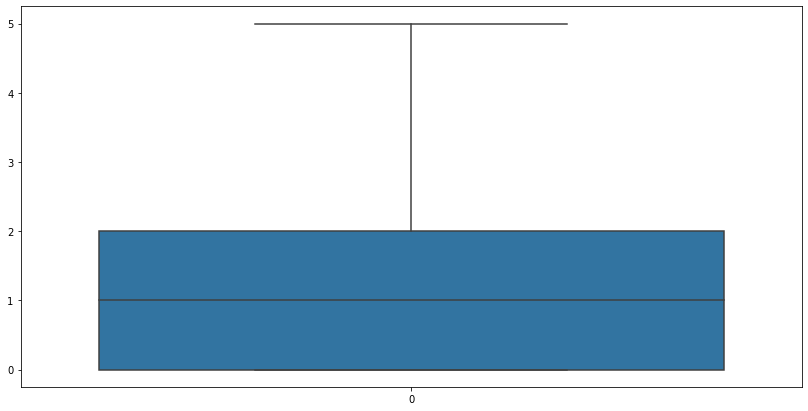

hogar_adul


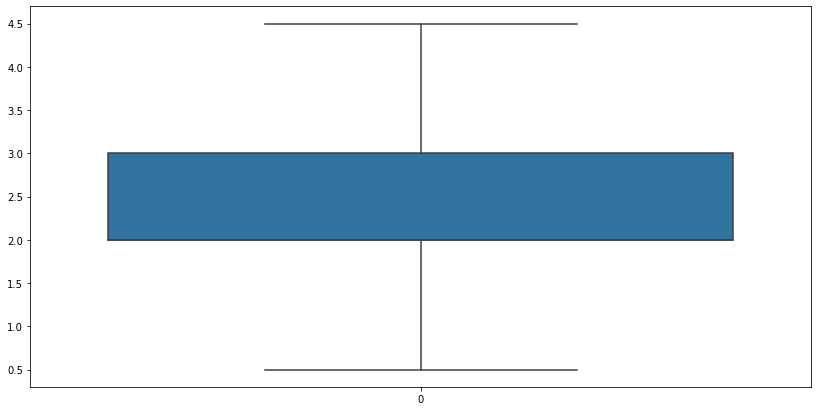

hogar_mayor


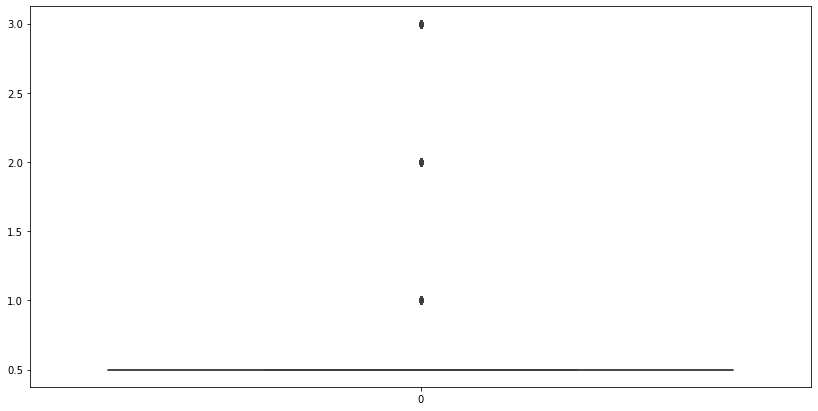

hogar_total


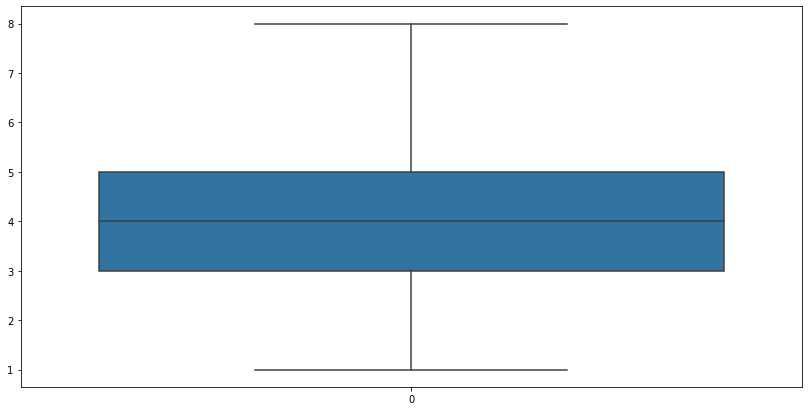

edjefe


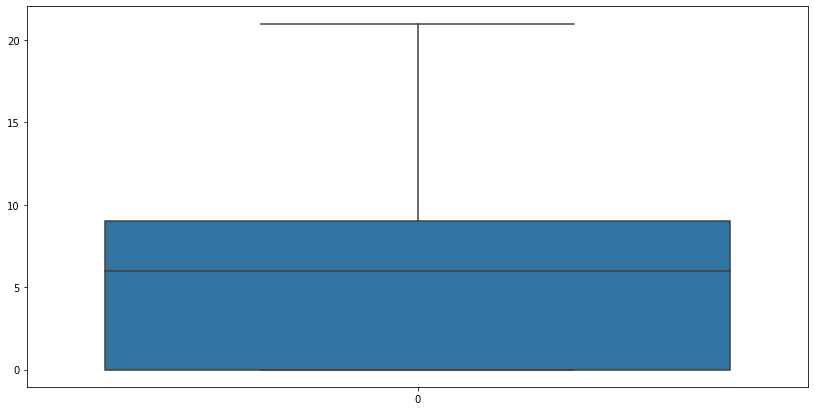

edjefa


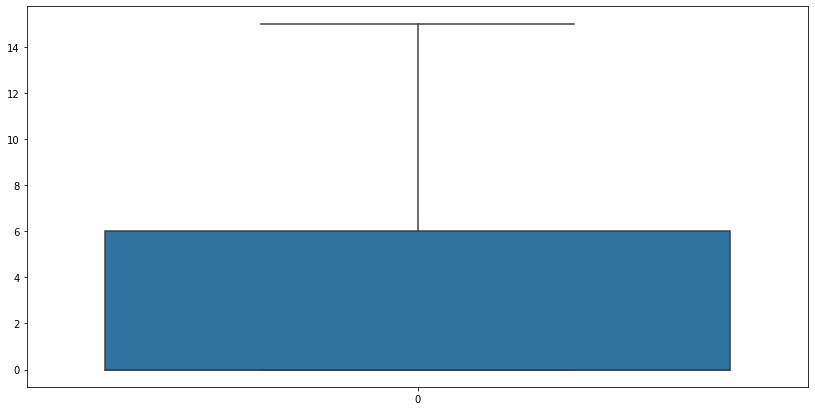

meaneduc


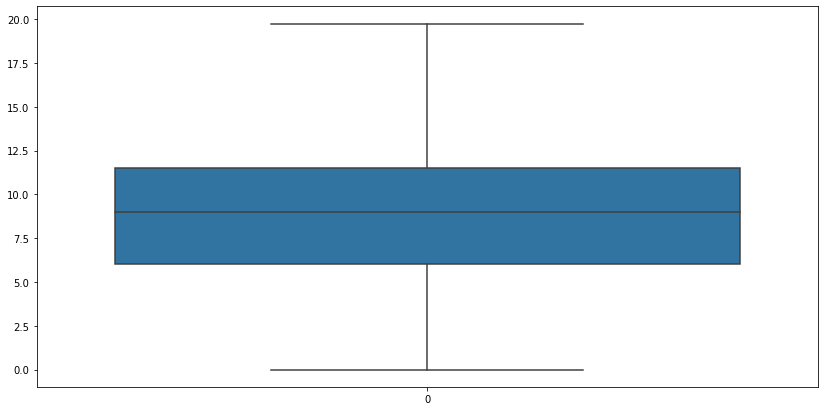

instlevel1 Binary column
instlevel2 Binary column
instlevel3 Binary column
instlevel4 Binary column
instlevel5 Binary column
instlevel6 Binary column
instlevel7 Binary column
instlevel8 Binary column
instlevel9 Binary column
bedrooms


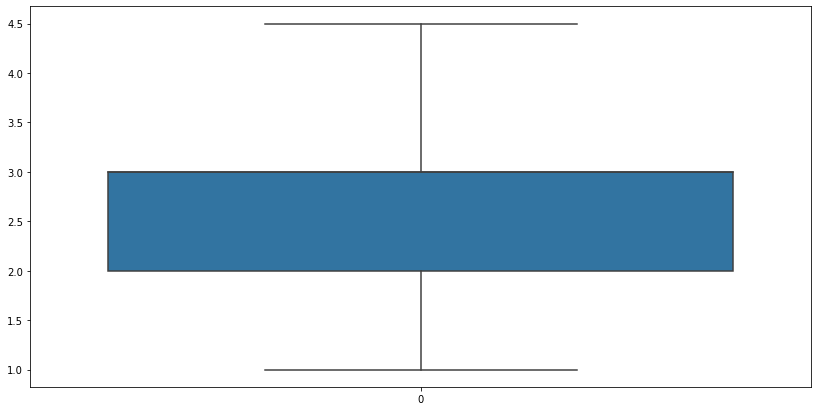

overcrowding


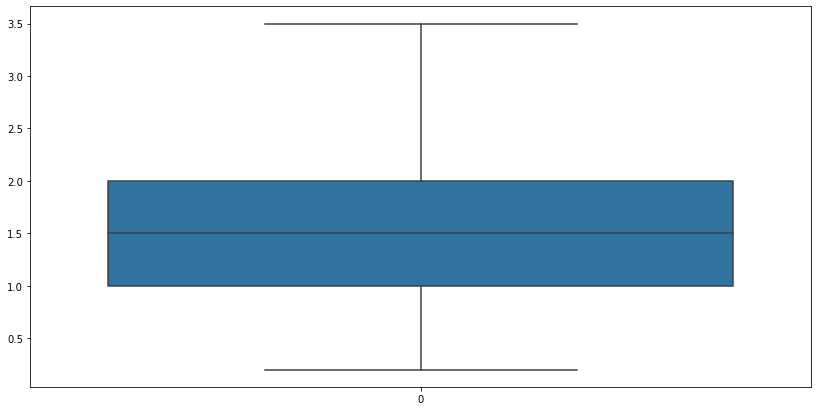

tipovivi1 Binary column
tipovivi2 Binary column
tipovivi3 Binary column
tipovivi4 Binary column
tipovivi5 Binary column
computer Binary column
television Binary column
mobilephone Binary column
qmobilephone


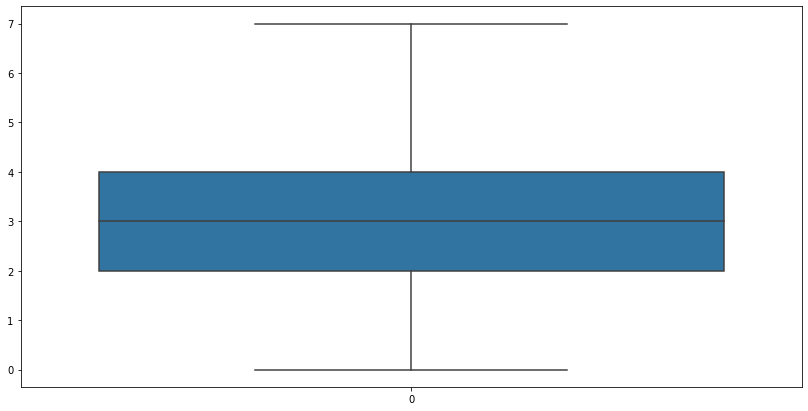

lugar1 Binary column
lugar2 Binary column
lugar3 Binary column
lugar4 Binary column
lugar5 Binary column
lugar6 Binary column
area1 Binary column
area2 Binary column
age


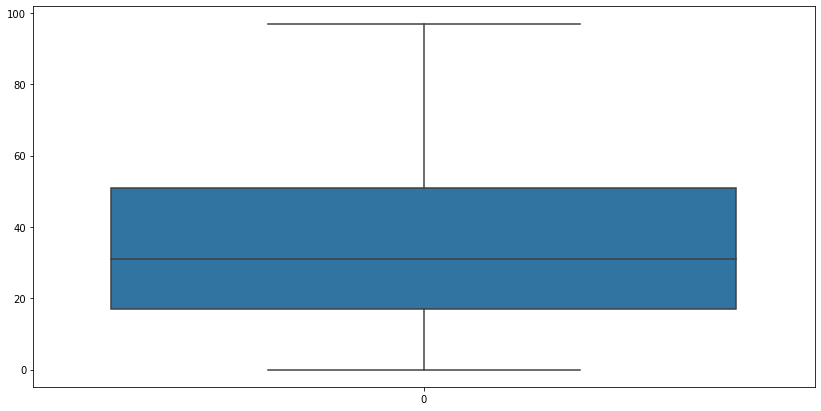

SQBescolari


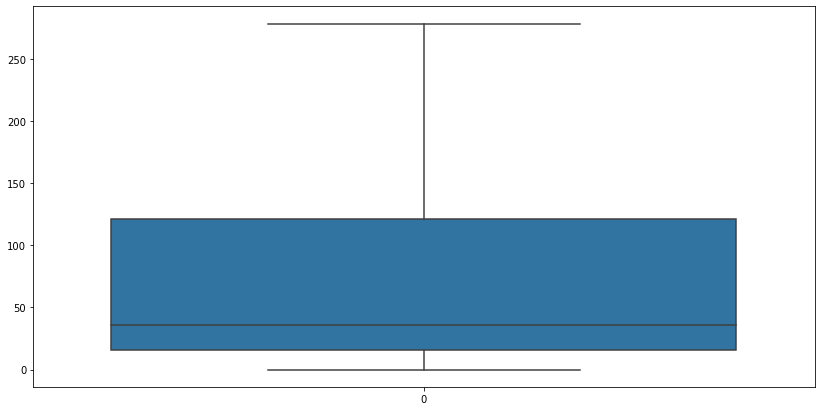

SQBage


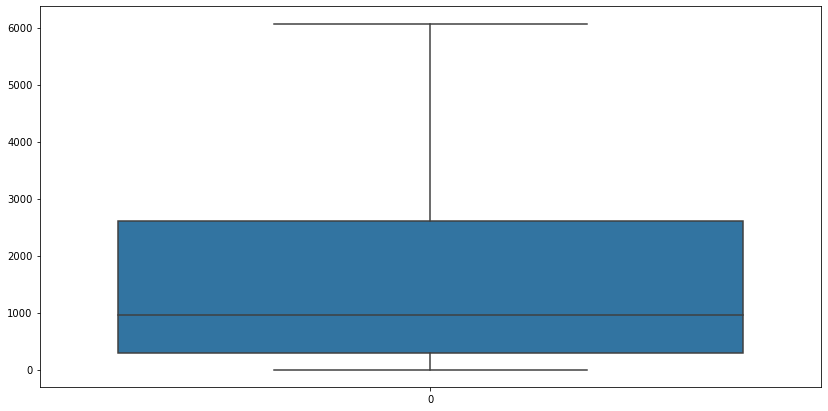

SQBhogar_total


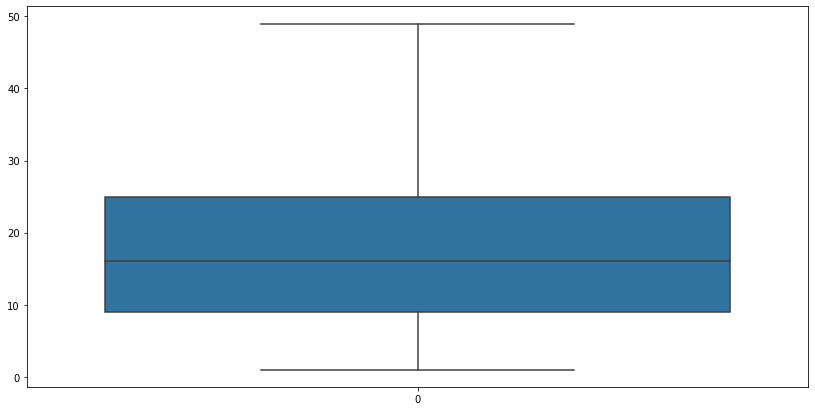

SQBedjefe


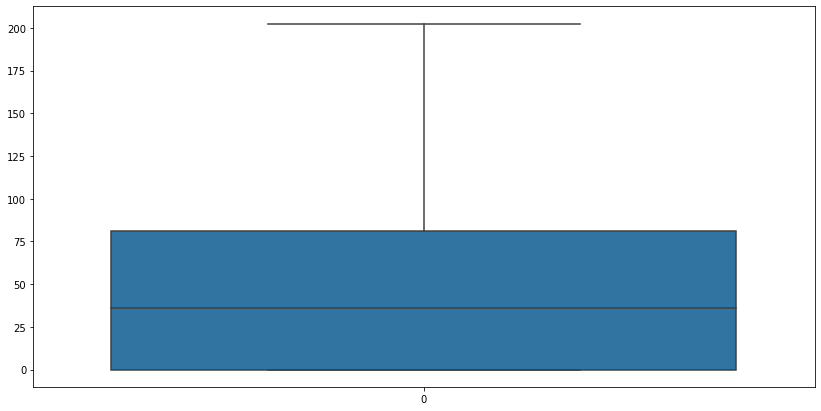

SQBhogar_nin


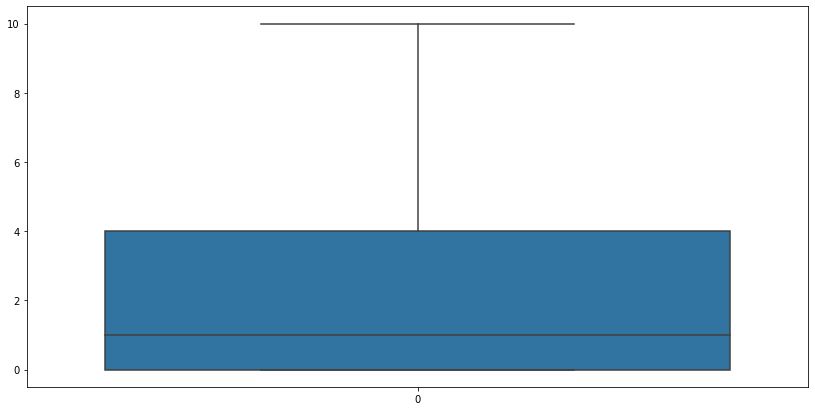

SQBovercrowding


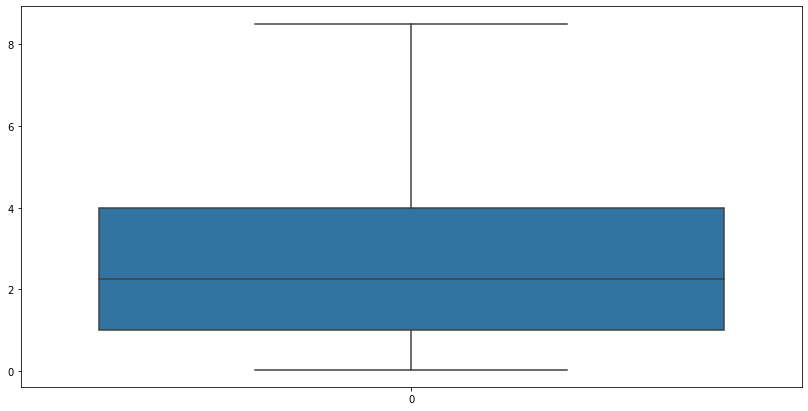

SQBdependency


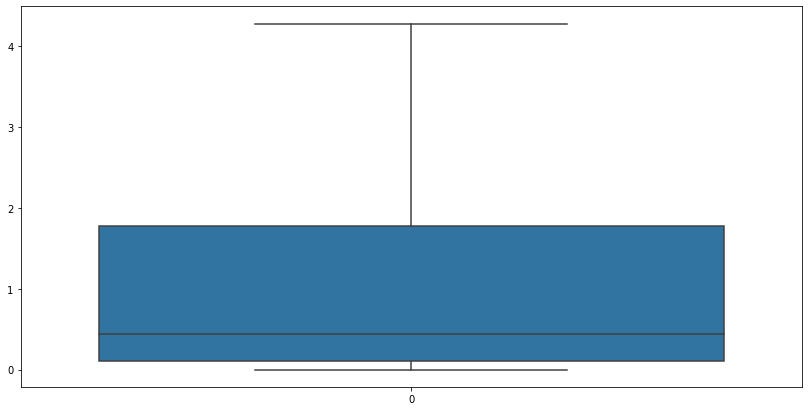

SQBmeaned


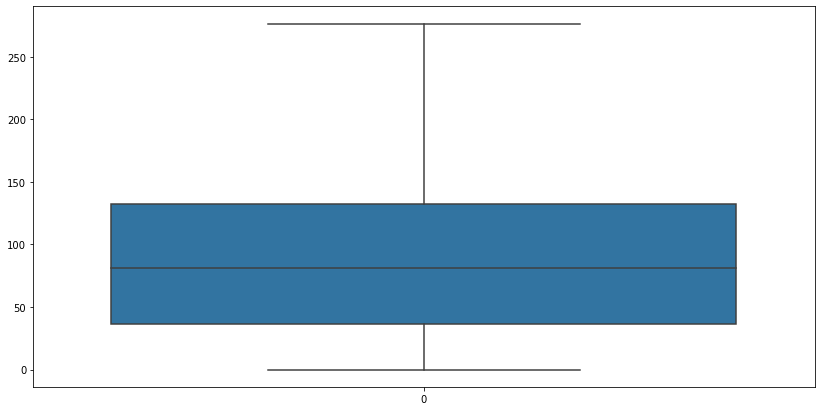

agesq


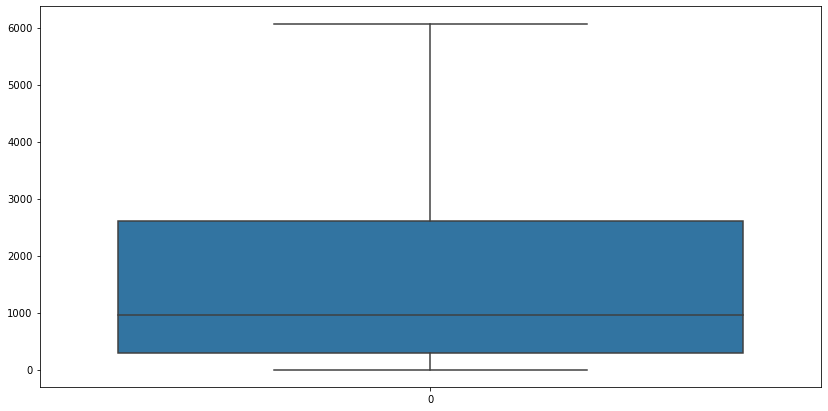

num_depend


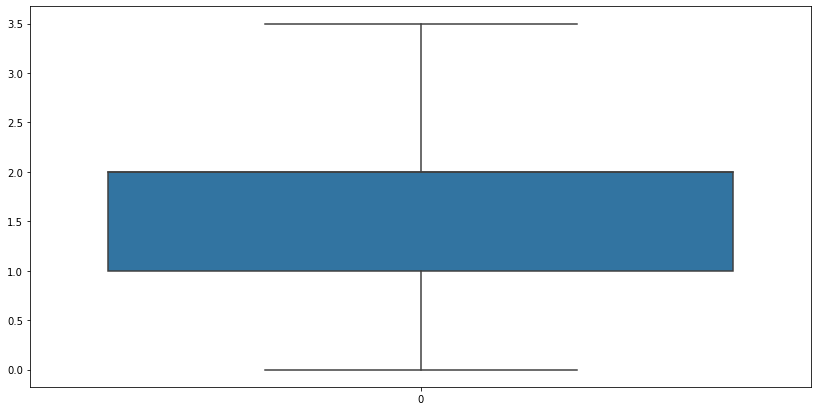

depend_ratio


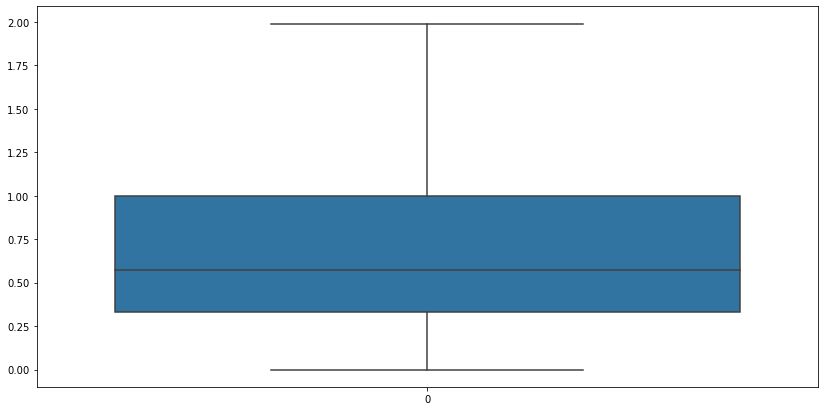

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'v18q1', 'r4h1',
       ...
       'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target', 'num_depend', 'depend_ratio'], dtype='object', length=141)

In [248]:
# Replace Outliers with respective upper/lower quartile range
# Drop categorical columns, target column, 


def Outlier(data, cols):
    bin_set = set([0,1])
    for column in data.drop(cols, axis=1).columns:
        if data[column].dtype != object:
            # ignore binary columns
            if set(data[column]) - bin_set:
                Q1 = np.percentile(data[column],25)
                Q3 = np.percentile(data[column],75)
                IQR =  Q3 - Q1
                
                print(column)
                fig = plt.figure(figsize = (14,7))
                sns.boxplot(data = df[column])
                plt.show()
    
                lower = Q1 - (1.5 * IQR) # min value allowed
                upper = Q3 + (1.5 * IQR)  # max. value allowed
            
                data[column] = data[column].apply(lambda x: upper if x>upper else  lower if x<lower else x)
           
    return data

df2 = Outlier(data = df, cols = ['Target']) #target
df2.columns

### Check whether all members of the house have the same poverty level.

In [268]:
unequal = df2.groupby(['idhogar']).Target.nunique().eq(1)
uneq_set = set(unequal[unequal == False].index)
uneq_set

{'0172ab1d9',
 '03f4e5f4d',
 '0511912b6',
 '078a0b6e2',
 '09e25d616',
 '0f3e65c83',
 '0f9494d3a',
 '15a891635',
 '17fb04a62',
 '18832b840',
 '26b3a0f41',
 '288579c97',
 '28893b5e7',
 '2c9872b82',
 '2cb443214',
 '309fb7246',
 '30a70901d',
 '3c6973219',
 '3c73c107f',
 '3df651058',
 '3fe29a56b',
 '410194c8b',
 '417865404',
 '42ec8bef5',
 '43b9c83e5',
 '44f219a16',
 '46af47063',
 '4b6077882',
 '4c2dba109',
 '4dc11e11f',
 '4e19bd549',
 '50e064ee8',
 '513adb616',
 '54118d5d9',
 '55a662731',
 '564eab113',
 '594d3eb27',
 '5c3f7725d',
 '5c6f32bbc',
 '5e9329fc6',
 '614b48fb7',
 '636330516',
 '654ef7612',
 '67ad49822',
 '6833ac5dc',
 '694a0cbf4',
 '6a389f3de',
 '6bcf799cf',
 '6c543442a',
 '71cd52a80',
 '73d85d05d',
 '7ad269eef',
 '7c57f8237',
 '7e9d58c5c',
 '7ea6aca15',
 '80a66379b',
 '811a35744',
 '8242a51ec',
 '8420bcfca',
 '8ae3e74ca',
 '8bb6da3c1',
 '932287f5d',
 '9bbf7c6ca',
 'a20ff33ba',
 'a3288e6fa',
 'a94a45642',
 'bcaa2e2f5',
 'bcab69521',
 'bd82509d1',
 'be91da044',
 'c13325faf',
 'c389

### Check if there is a house without a family head.

In [267]:
hoh_count = df.groupby(['idhogar'])['parentesco1'].sum()
hh_set = set(hoh_count[hoh_count != 1].index)
hh_set

{'03c6bdf85',
 '09b195e7a',
 '1367ab31d',
 '1bc617b23',
 '374ca5a19',
 '61c10e099',
 '6b1b2405f',
 '896fe6d3e',
 'a0812ef17',
 'ad687ad89',
 'b1f4d89d7',
 'bfd5067c2',
 'c0c8a5013',
 'd363d9183',
 'f2bfa75c4'}

### Set poverty level of the members and the head of the house within a family.

In [269]:
# Do any households have both missing head of household and different poverty levels?

hh_set.intersection(uneq_set)

set()

In [ ]:
# https://pandas.pydata.org/docs/user_guide/groupby.html

### Count how many null values are existing in columns.

In [270]:
# Check for nulls

has_nulls = df.isnull().sum()
has_nulls[has_nulls > 0]

Series([], dtype: int64)

### Remove null value rows of the target variable.

### Predict the accuracy using random forest classifier.

### Check the accuracy using random forest with cross validation.